## Jagan and Eryk's Dataset Analysis 

####  Notebook 2 of 2 for Module 1 Project

* Student names:  **Jagandeep Singh** and **Eryk Wdowiak**
* Student pace:  full-time
* Scheduled project review date:  10 July
* Instructor name:  Fangfang Lee
* Blog post URL:  https://www.wdowiak.me/gotta-blog?answer=Yes

This notebook conducts a statistical analysis of the movie dataset,
that we assembled in a previous notebook.

### load Python packages and dataframe

In [1]:
## importing Python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import datetime
import seaborn as sns
%matplotlib inline
import pickle

In [2]:
# get the dataframe from pickle file
merged = pickle.load(open('movie-df_2020-07-09b.p','rb'))

###  overview of profitability

In [3]:
merged['rate_return'] = merged['ln_worldwide'] - merged['ln_budget']
merged[merged.rate_return == float("-inf")]  = None

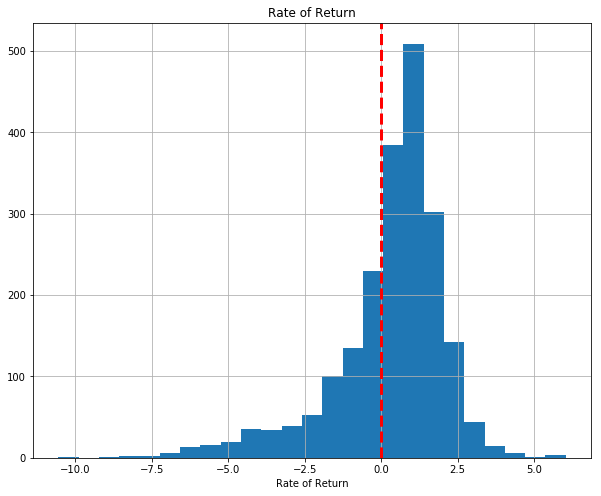

In [4]:
merged['rate_return'].hist(bins = 25, figsize = (10,8))
plt.axvline(x = 0, color='r', linestyle='dashed', linewidth=3)
plt.title("Rate of Return")
plt.xlabel("Rate of Return");

In [5]:
print("average RoR:  " + str(merged['rate_return'].mean()))
print("median  RoR:  " + str(merged['rate_return'].median()))
print("std dev RoR:  " + str(merged['rate_return'].std()))

average RoR:  0.26596501547093127
median  RoR:  0.67112926382103
std dev RoR:  1.8576468079734032


###  budget and profitability

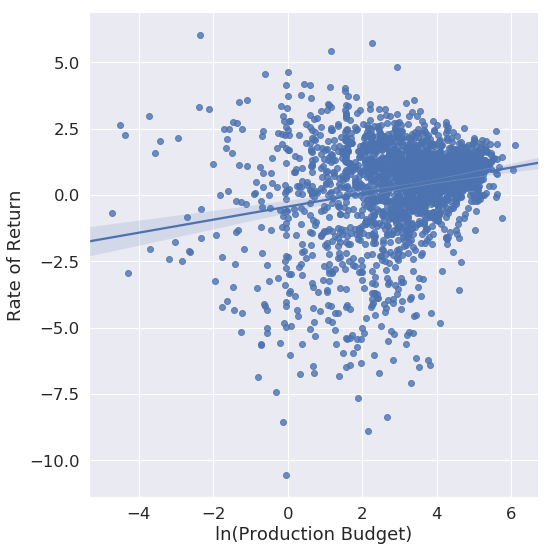

In [6]:
sns.set(font_scale = 1.5)
fig = sns.lmplot(x='ln_budget', y='rate_return', data = merged, fit_reg=True, height=8, aspect=1);
fig.set_axis_labels('ln(Production Budget)','Rate of Return');

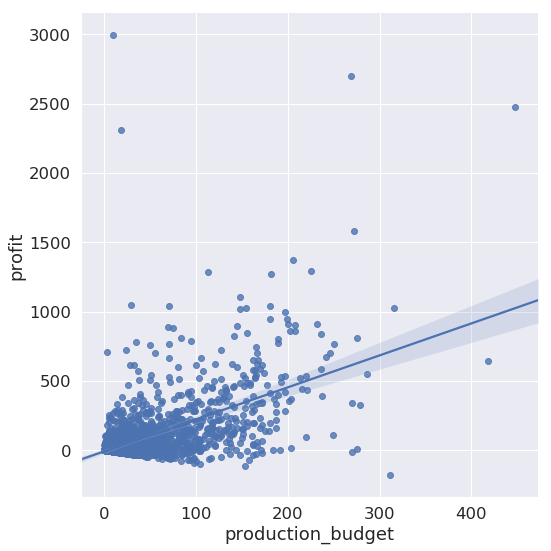

In [7]:
sns.set(font_scale = 1.5)
sns.lmplot(x='production_budget', y='profit', data = merged, fit_reg=True, height=8, aspect=1);
fig.set_axis_labels('Production Budget','Profit');

###  how month of release affects profitability

In [8]:
#Average profit of movies grouped by release month
#merged.sort_values(by = 'profit', ascending = False).groupby('release_month')['profit'].mean()

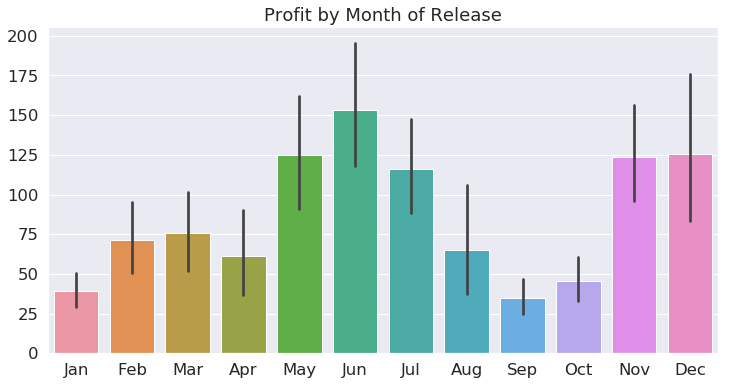

In [9]:
sns.set(font_scale = 1.5)
plt.figure(figsize=(12,6))
ax = sns.barplot(merged['release_month'], merged['profit'])
ax.set_title("Profit by Month of Release")
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']);

####  add to binned ratings to dataframe

In [10]:
## Binning rating and creating another column
bins = [2, 4, 6, 8, 10]
merged['binned_rating'] = pd.cut(merged['ratings'], bins)

In [11]:
merged.sort_values(by = 'profit', ascending = False).groupby('binned_rating')['profit'].median()

binned_rating
(2, 4]      4.558796
(4, 6]      7.729018
(6, 8]     24.238443
(8, 10]    68.841220
Name: profit, dtype: float64

Text(0.5, 1.0, 'Ratings by Profit')

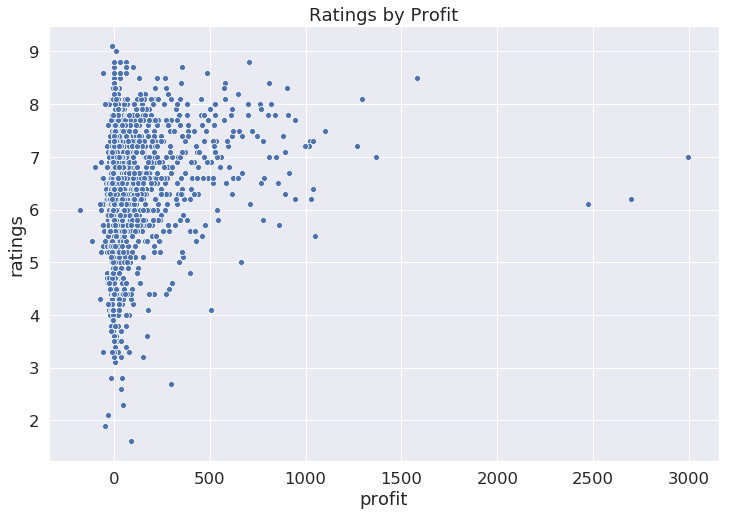

In [12]:
#rating and profit graph
plt.figure(figsize=(12,8))
sns.set(font_scale = 1.5)
ax = sns.scatterplot('profit', 'ratings', data=merged[['ratings', 'profit']])
ax.set_title("Ratings by Profit")

Text(0.5, 1.0, 'Ratings by Profit')

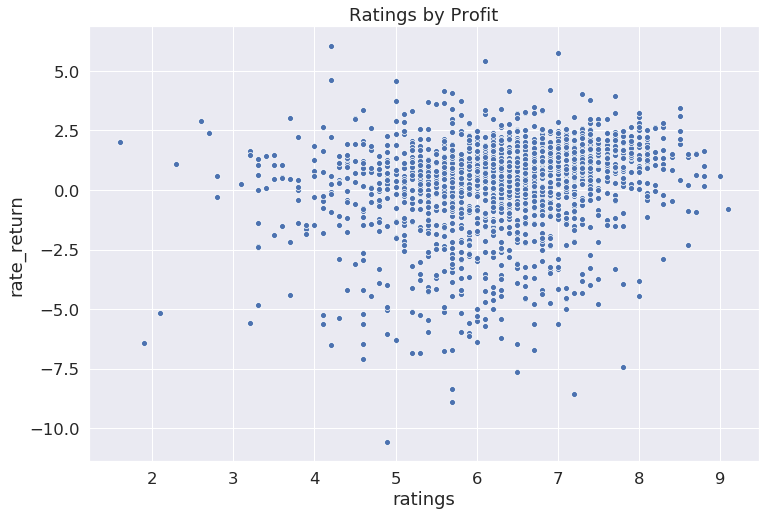

In [13]:
#rating and profit graph
plt.figure(figsize=(12,8))
sns.set(font_scale = 1.5)
ax = sns.scatterplot('ratings', 'rate_return', data=merged[['ratings','rate_return']])
ax.set_title("Ratings by Profit")

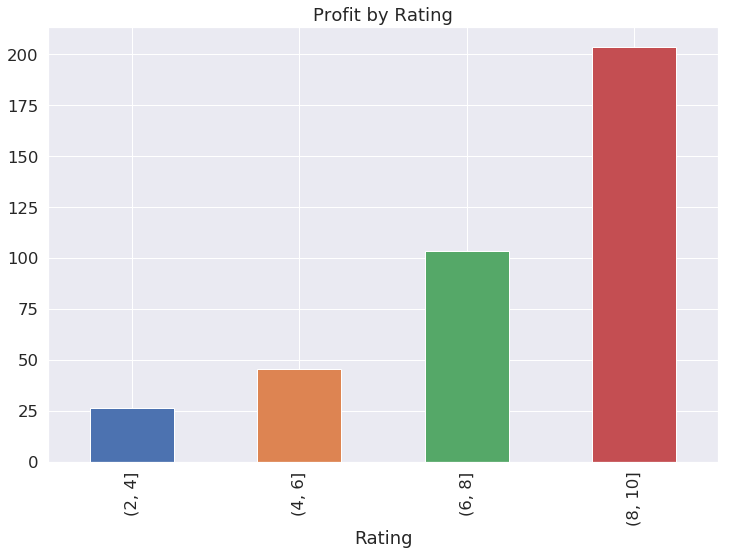

In [14]:
#Average profit of movies grouped by rating
plt.figure(figsize=(12,8))
sns.set(font_scale = 1.5)
merged.sort_values(by = 'profit', ascending = False).groupby('binned_rating')['profit'].mean().plot(kind='bar');
plt.title("Profit by Rating")
plt.xlabel("Rating")
plt.show()

### the 100 Most Profitable and 100 Least Profitable Movies

In [15]:
# Top 100 and bottom 100 profitable movies
top_100 = merged.sort_values(by = 'profit', ascending = False).head(100)
bottom_100 = merged.sort_values(by = 'profit').head(100)

### genres in the 100 Most Profitable and 100 Least Profitable


In [16]:
## Genres of the 100 Most Profitable movies
top_100_genres = list(top_100.genres)
cleanedList = [x for x in top_100_genres if (str(x) != 'nan')]
flat_list = [item for sublist in cleanedList for item in sublist]
flat_list.remove('A')
flat_list.remove('c')
flat_list.remove('t')
flat_list.remove('i')
flat_list.remove('o')
flat_list.remove('n')
flat_list.remove('')
top_genre = list(set(flat_list))
top_genre.remove('')
top_genre

del cleanedList, flat_list

##  Genres in the 100 Least Profitable movies
bottom_100_genres = list(bottom_100.genres)
cleanedList = [x for x in bottom_100_genres if (str(x) != 'nan')]
flat_list = [item for sublist in cleanedList for item in sublist]
bottom_genre = list(set(flat_list))
bottom_genre.remove('')

del cleanedList, flat_list

In [17]:
##  count the number of movies that have a particular genre
def percentage_of_genre(df,genre):
    count = 0
    for item in df.genres:
        if not isinstance(item, float):
            if genre in item:
                count += 1
    return count

In [18]:
## percentage of genre in 100 most profitable
top = {}
for item in top_genre:
    #print(item + " Movies " + str(percentage_of_genre(top_100, item)) +"%" )
    top[item] = percentage_of_genre(top_100, item)

## percentage of genre in 100 least profitable
bottom = {}
for item in bottom_genre:
    #print(item + " Movies " + str(percentage_of_genre(bottom_100, item)) +"%" )
    bottom[item] = percentage_of_genre(bottom_100, item)

In [19]:
##  now create a BarPlot for Percentage of Genres in Most Profitable and Least Profitable

##  first create a data frame for top and bottom genre percentage for plot
genre_df = pd.DataFrame({'bottom':pd.Series(bottom), 'a_top':pd.Series(top)})

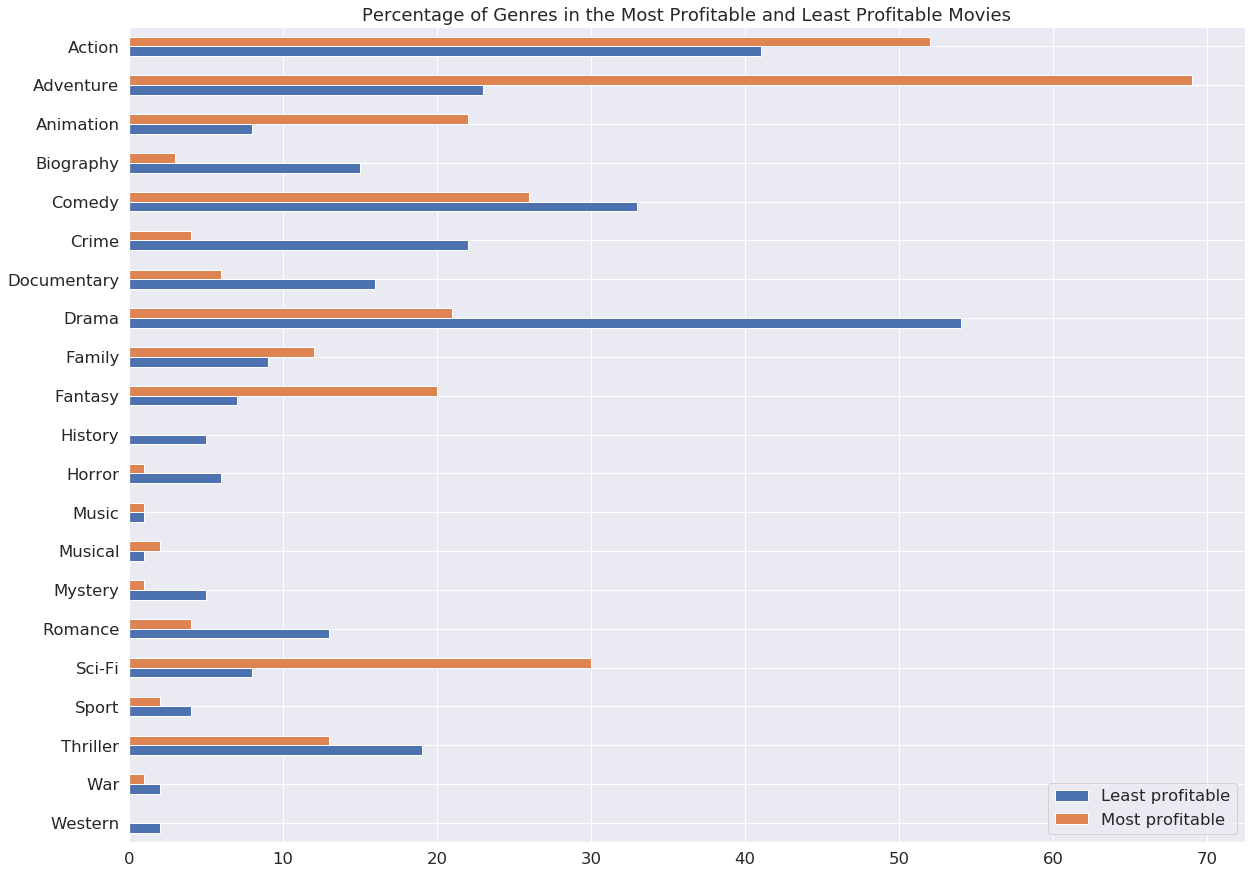

In [20]:
##  now plot genres for Most Profitable and Least Profitable
ax = genre_df.sort_index(ascending = False).plot(kind='barh', title ="Percentage of Genres in the Most Profitable and Least Profitable Movies", figsize=(20, 15))
ax.legend(labels = ['Least profitable','Most profitable'])
plt.show()

##  analyses for further exploration

###  Principals in the 20 Most Profitable movies

In [21]:
##  Directors of top_20 Most Profitable movies
top_20 = merged.sort_values(by = 'profit', ascending = False).head(20)

##  directors in the top_20 Most Profitable movies
top_20_directors = list(top_20.directors)
flat_list = [item for sublist in top_20_directors for item in sublist]
top_directors = set(flat_list)
print('Directors in the Top 20 Most Profitable movies:')
print(list(top_directors)[0:10])

del flat_list
print()

##  actors in the top_20 Most Profitable movies
top_20_actors = list(top_20.actors)
flat_list = [item for sublist in top_20_actors for item in sublist]
top_actors = set(flat_list)
print('Actors in the Top 20 Most Profitable movies:')
list(top_actors)[0:10]

del flat_list

Directors in the Top 20 Most Profitable movies:
['F. Gary Gray', 'Paul Hendy', 'r', 'Brad Bird', 'a', ' ', 'o', 'Chi-kin Kwok', 'Colin Trevorrow', 'Joss Whedon']

Actors in the Top 20 Most Profitable movies:


###  profitability by studio

In [22]:
## Studios and profit
merged.groupby('studio')['profit'].mean().sort_values(ascending=False).head(20)

studio
P/DW        382.562574
BV          323.381017
GrtIndia    216.619584
Uni.        171.689486
Sony        170.567241
Fox         168.426108
WB (NL)     167.851702
WB          137.982872
Par.        130.987781
Strand      122.189974
MGM          89.667120
UTV          89.639907
Sum.         88.963116
MBox         82.245858
LGF          82.168469
SGem         66.351100
LG/S         63.894280
TriS         63.044975
W/Dim.       59.246133
Wein.        48.995542
Name: profit, dtype: float64